In [247]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [248]:
# load data
data = pd.read_csv('dataset.csv' , header=None) 
data = data.dropna()


In [249]:
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,wu,wr,wd,wl,au,ar,ad,al,bu,br,bd,bl,direction
67,128,208,384,304,0,0,0,1,0,0,1,0,3
68,128,224,384,288,0,0,0,1,0,1,0,0,3
69,128,240,384,272,0,0,0,1,0,1,0,0,3
70,128,256,384,256,0,0,0,1,0,1,0,0,3


In [250]:
data = data.iloc[1:]
data

,0,1,2,3,4,5,6,7,8,9,10,11,12
67,128,208,384,304,0,0,0,1,0,0,1,0,3
68,128,224,384,288,0,0,0,1,0,1,0,0,3
69,128,240,384,272,0,0,0,1,0,1,0,0,3
70,128,256,384,256,0,0,0,1,0,1,0,0,3
71,128,272,384,240,0,0,0,1,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11944,496,208,16,304,0,0,0,1,0,1,0,0,3
11945,496,224,16,288,0,0,0,1,0,1,0,0,3
11946,496,240,16,272,0,0,0,1,0,1,0,0,3
11947,496,256,16,256,0,0,0,1,0,1,0,0,3


In [251]:
X = data.iloc[:,:-1].astype(int).values # همه ردیف ها تا ستون اخر
Y = data.iloc[: ,-1].astype(int).values # همه ردیف ها فقط ستون اخرشون


In [254]:
X_train , X_test ,Y_train ,Y_test = train_test_split(X,Y, test_size=0.2, shuffle=True)


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12 , activation='sigmoid') , 
    tf.keras.layers.Dense(30,activation='relu') , 
    tf.keras.layers.Dense(16,activation='relu') , 
    tf.keras.layers.Dense(4 , activation='softmax')
])

In [255]:
X_train.shape , Y_train.shape , X_test.shape , Y_test.shape

((4880, 12), (4880,), (1220, 12), (1220,))

In [ ]:
enc = OneHotEncoder()
enc.fit(Y)
onehotlabels = enc.transform(Y).toarray()
labels = pd.DataFrame(onehotlabels)
#Y.shape , X.shape


In [257]:
model.compile(optimizer='adam' ,
              loss='sparse_categorical_crossentropy' , 
              metrics=['accuracy']
)


In [258]:
output = model.fit(X_train,Y_train,epochs=100)

Epoch 1/100
153/153 [==============================] - 2s 3ms/step - loss: 0.9582 - accuracy: 0.5094
Epoch 2/100
153/153 [==============================] - 1s 3ms/step - loss: 0.8225 - accuracy: 0.5318
Epoch 3/100
153/153 [==============================] - 0s 3ms/step - loss: 0.8204 - accuracy: 0.5252
Epoch 4/100
153/153 [==============================] - 0s 3ms/step - loss: 0.8186 - accuracy: 0.5281
Epoch 5/100
153/153 [==============================] - 1s 5ms/step - loss: 0.8125 - accuracy: 0.5402
Epoch 6/100
153/153 [==============================] - 1s 3ms/step - loss: 0.8121 - accuracy: 0.5432
Epoch 7/100
153/153 [==============================] - 1s 4ms/step - loss: 0.8072 - accuracy: 0.5576
Epoch 8/100
153/153 [==============================] - 0s 3ms/step - loss: 0.8042 - accuracy: 0.5662
Epoch 9/100
153/153 [==============================] - 1s 4ms/step - loss: 0.7974 - accuracy: 0.5738
Epoch 10/100
153/153 [==============================] - 0s 3ms/step - loss: 0.7914 - accura

In [259]:
loss , accuracy = model.evaluate(X_test,Y_test)

39/39 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000


In [260]:
model.save('snake_game_model.h5')


c:\Program Files\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


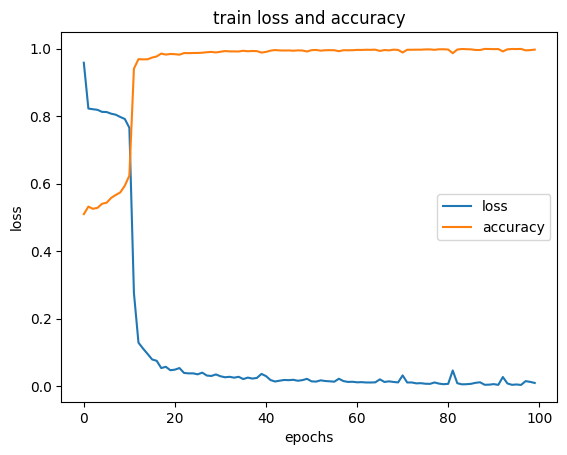

In [261]:

plt.plot(output.history["loss"], label='loss')
plt.plot(output.history["accuracy"], label='accuracy')
plt.title("train loss and accuracy")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()